In [1]:
import numpy as np
X_MAX = 2000.0
Y_MAX = 2000.0  # The area region in meters
MAX_VALS = np.array([[X_MAX, Y_MAX]])
m2=np.array([X_MAX, Y_MAX])
MAX_VALS[0]

array([2000., 2000.])

In [13]:
m2[1]

2000.0

In [1]:
REPLAY_MEMORY_SIZE = 100_000  #就是100000，加下划线使得可读性更高
REPLAY_MEMORY_SIZE

100000

In [4]:
episode_all = np.arange(5000)
episode_all

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [9]:
epsilon=0.5
EPSILON_DECAY=0.998
MIN_EPSILON=0
epsilon_all = epsilon * EPSILON_DECAY ** episode_all
epsilon_all = np.maximum(epsilon_all, MIN_EPSILON)
epsilon_all

array([5.00000000e-01, 4.99000000e-01, 4.98002000e-01, ...,
       2.26091803e-05, 2.25639619e-05, 2.25188340e-05])

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(episode_all, epsilon_all, 'b', linewidth=2)
plt.grid(True, which='both', axis='both')
plt.show()

NameError: name 'episode_all' is not defined

<Figure size 432x288 with 0 Axes>

In [14]:
ACTIONS = np.array([[0, 1],
                    [1, 0],
                    [0, -1],
                    [-1, 0]], dtype=int)  # the possible actions (UAV flying directions)
ACTION_SPACE_SIZE = ACTIONS.shape[0]  #shape[0]是拉伸成一维后的长度
ACTION_SPACE_SIZE

4

In [18]:
loc_x = np.random.uniform(50,2000 - 50, (1, 1))  #均匀分布，左闭右开,这里的得到的是[[数值]]
loc_y = np.random.uniform(50, 2000 - 50, (1, 1))
loc = np.concatenate((loc_x, loc_y), axis=1) #对应列拼接，axis=0，则是对应行拼接,默认为0 

In [19]:
loc_x

array([[1516.95186006]])

In [20]:
loc_y

array([[769.75441083]])

In [21]:
loc

array([[1516.95186006,  769.75441083]])

In [2]:
SamplePoints = np.linspace(0, 1, 100)
SamplePoints

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [4]:
SamplePoints = np.linspace(0, 1, 100)
XRange = np.floor(SamplePoints * (101 - 1))
YRange = np.floor(SamplePoints * (101 - 1))
Idx_vec = np.int_((np.array(XRange) * 10 * 101 + np.array(YRange)))

In [5]:
XRange

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
       100.])

In [6]:
YRange

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
       100.])

In [8]:
Idx_vec.shape

(100,)

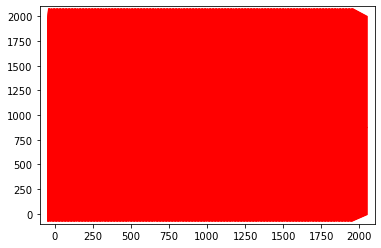

In [5]:
x = np.linspace(0, X_MAX, 200)
y = np.linspace(0, Y_MAX, 200)
xx, yy = np.meshgrid(x, y, indexing='ij')
plt.figure(0)
plt.plot(DESTINATION[0, 0], DESTINATION[0, 1], 'r>', markersize=15)
plt.show()

In [11]:
a=np.array([[1,2],
          [3,4],
          [5,6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [19]:
b=a.shape[0]  #返回行数
b

3

In [21]:
a.shape[1]   #返回列数
# a[1]

2

In [14]:
a.shape[2]

IndexError: tuple index out of range

In [28]:
current_state=np.array([[1,2,3,4]])
current_state.shape
a=np.squeeze(current_state)
a.shape
a=np.squeeze(a)

In [29]:
a

array([1, 2, 3, 4])

In [2]:
a1=np.array([-1.7,0.6,2])
a1


array([-1.7,  0.6,  2. ])

In [3]:
np.floor(a1) #向下取整

array([-2.,  0.,  2.])

In [4]:
int(a1)

TypeError: only size-1 arrays can be converted to Python scalars

In [5]:
int(-1.7)  #截断，只保留整数

-1